# Testing examples from topography

In [ ]:
#!mamba env create -f '../../environment.yml'
#!mamba env update -f '../../environment.yml' --prune

In [1]:
# this block is for developing the module, comment out when using the module, and uncomment import easysnowdata
%load_ext autoreload
%autoreload 2
%aimport easysnowdata

In [2]:
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
import shapely
import dask
import pystac_client
import planetary_computer
import odc.stac
import matplotlib.pyplot as plt
import matplotlib.colors
import datetime

In [3]:
bbox_gdf = gpd.read_file('https://github.com/egagli/sar_snowmelt_timing/raw/main/input/shapefiles/mt_rainier.geojson')

## Copernicus DEM

In [4]:
%%time
cop30_dem = easysnowdata.topography.get_copernicus_dem(bbox_gdf)
cop30_dem

CPU times: user 19.3 ms, sys: 9.33 ms, total: 28.6 ms
Wall time: 1.9 s


<xarray.DataArray 'data' (latitude: 563, longitude: 828)> Size: 2MB
dask.array<getitem, shape=(563, 828), dtype=float32, chunksize=(563, 828), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 5kB 46.95 46.95 46.95 ... 46.79 46.79 46.79
  * longitude    (longitude) float64 7kB -121.9 -121.9 -121.9 ... -121.6 -121.6
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2021-04-22

In [5]:
%%time
cop90_dem = easysnowdata.topography.get_copernicus_dem(bbox_gdf, resolution=90)
cop90_dem

CPU times: user 13.1 ms, sys: 9.52 ms, total: 22.6 ms
Wall time: 1.17 s


<xarray.DataArray 'data' (latitude: 188, longitude: 276)> Size: 208kB
dask.array<getitem, shape=(188, 276), dtype=float32, chunksize=(188, 276), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 2kB 46.95 46.95 46.95 ... 46.8 46.79 46.79
  * longitude    (longitude) float64 2kB -121.9 -121.9 -121.9 ... -121.6 -121.6
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2021-04-22

Text(0.5, 1.0, 'Copernicus 90m DEM')

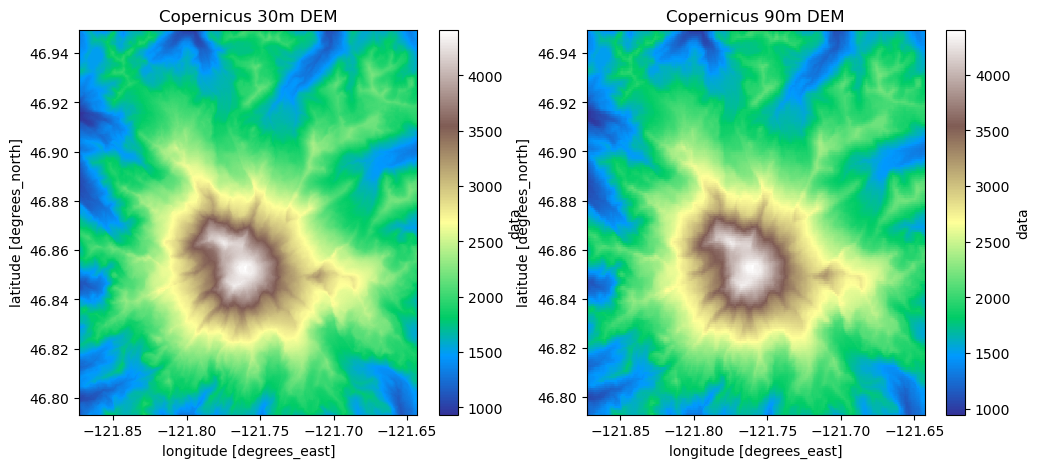

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,5))

cop30_dem.plot(ax=ax[0],cmap='terrain')
cop90_dem.plot(ax=ax[1],cmap='terrain')


ax[0].set_title('Copernicus 30m DEM')
ax[1].set_title('Copernicus 90m DEM')

In [3]:
# %%time
# dsm_3dep = easysnowdata.topography.get_3dep_dem(bbox_gdf,dem_type='DTM')
# dsm_3dep.item_collection()

In [4]:
# !pip install -q py3dep
# import py3dep

In [5]:
# py3dep.get_map('DEM',geometry=bbox_gdf.geometry[0],resolution=10).plot()

In [6]:
# tuple(bbox_gdf.bounds.values[0])

In [7]:
# py3dep.query_3dep_sources(tuple(bbox_gdf.bounds.values[0]))

In [8]:
# py3dep.check_3dep_availability(tuple(bbox_gdf.bounds.values[0]))